# ML Stock Prediction Final Code Submission
## Emperical Evaluations for Different Approaches of Stock Prediction 
## Group 5
<br/>
Ronghan Che <br />
Erwin Feuzeu<br />
Punita Verma<br />

In [1]:
## Requirement pyti, panda.Datareader, tensorflow 

In this milestone we will implement Long Short Term Model (LSTM) experiemneted with 4 different input methods to evaluate the performances and compare the prediction accuracy. <br />
Input method 1: Basic stock attributes (Open, Close, High, Low, Adjusted Close). <br />
Input method 2: Basic stock attributes and every technical indicator being imported. <br />
Input method 3: Applying Principal Component Analysis on both basic stock attributes and all the technical indicators. <br />
Input method 4: Reserving basic stock attributes; and applying PCA on the other stock attributes. 

## Technical Indicators

##### Part 1. Core indicator variables would be used in other indicators in the future; returned as arrays

### Accumulation Distribution
A/D indicator is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed

In [2]:
import warnings
warnings.filterwarnings('ignore')
from pyti.accumulation_distribution import accumulation_distribution as ad
def accumulation_distribution(df, field_1='Close', field_2='High', field_3='Low', field_4='Volume'):
    adArray = ad(df[field_1], df[field_2], df[field_3], df[field_4])
    return adArray

### Exponential Moving Average 
EMA is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. 

In [3]:
from pyti.exponential_moving_average import exponential_moving_average as ema
def exponential_moving_average(df, n, field='Close'):
    emaArray = ema(df[field], n)
    return emaArray

### Moving Avergae 
Moving Average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

In [4]:
def moving_average(df, n):
    ma = df['Close'].rolling(n, min_periods=n).mean()
    return ma

### Momentum 
Momentum is the speed or velocity of price changes in a stock, security, or tradable instrument. Momentum shows the rate of change in price movement over a period of time to help investors determine the strength of a trend.

In [5]:
def momentum(df, n):
    momentum = df['Close'].diff(n)
    return momentum

### Rate of Change
ROC is a momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.

In [6]:
def rate_of_change(df, n):
    roc_array = df['Close'].diff(n - 1) / df['Close'].shift(n - 1)
    return roc_array 

### Weighted Moving Average 
WMA is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.

In [7]:
from pyti.weighted_moving_average import weighted_moving_average as wma
def weighted_moving_average(df, n):
    wma_array = wma(df['Close'], n)
    return wma_array 

##### Part 2. Technical indicators that would possibly return multiple attributes; being directly added into the original dataframe

### Aroon
Aroon is a technical indicator that is used to identify trend changes in the price of an asset, as well as the strength of that trend. 

In [8]:
from pyti.aroon import aroon_up, aroon_down
def aroon(df, n, field='Close'):
    aroon_upArray = aroon_up(df[field], n)
    aroon_downArray = aroon_down(df[field], n)
    df["aroon_up_" + str(n)] = aroon_upArray
    df["aroon_down_" + str(n)] = aroon_downArray
    return df

### Average True Range
ATR is a volatility indicator that shows how much an asset moves, on average, during a given time frame. 

In [9]:
from pyti.average_true_range import average_true_range as atr
def average_true_range(df, n, field='Close'):
    atrArray = atr(df[field], n)
    df["average_true_range_" + str(n)] = atrArray
    return df

### Bollinger Bands
Short term: 10 day moving average, n = 10 <br />
Medium term: 20 day moving average, n = 20 <br />
Long term: 50 day moving average, n = 50

In [10]:
def bollinger_bands(df, n, term):
    ##df = df.sort_values('Date').set_index('Date')
    ma = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
    std = pd.Series(df['Close'].rolling(n, min_periods=n).std())
    if term == "short":
        t = 1.5
    elif term == "medium":
        t = 2
    elif term == "long":
        t = 2.5
    ub = ma + t * std
    Upper_band = pd.Series(ub, name='Bollinger_upper_'+term)
    df = df.join(Upper_band)
    lb = ma - t * std
    Lower_band = pd.Series(lb, name='Bollinger_lower_'+term)
    df = df.join(Lower_band)
    Ma = pd.Series(ma, name='Moving_average_'+term)
    df = df.join(Ma)
    return df

### Commodity Channel Index 
CCI is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold.<br />
short: n = 30 days; <br />
medium: n = 40 days; <br />
long: n = 50 days

In [11]:
def commodity_channel_index(df, n):
    avep = (df['High'] + df['Low'] + df['Close']) / 3
    sma_of_avep = avep.rolling(n, min_periods=n).mean()
    ma = avep.rolling(n, min_periods=n).std()
    cci_array = (avep - sma_of_avep) / (0.015 * ma)
    df["Commodity Channel Index_" + str(n)] = cci_array 
    return df

### Chande Momentum Oscillator
CMO is a technical momentum indicator developed by Tushar Chande.

In [12]:
from numpy.core.records import ndarray
from pyti.chande_momentum_oscillator import chande_momentum_oscillator as cmo
def chande_momentum_oscillator(df, n, field='Close') -> ndarray:
    cmo_array = cmo(df[field], n)
    df["Chande Momentum Oscillator_"+str(n)] = cmo_array
    return df

### Chaikin Oscillator
The Chaikin Oscillator is the difference between the 3-day and 10-day EMAs of the Accumulation Distribution Line.<br />
cho = ema(ad, 3) - ema(ad, 10)

In [13]:
from pyti.exponential_moving_average import exponential_moving_average as ema
def chaikin_oscillator(df):
    cho_array = ema(accumulation_distribution(df), 3) - ema(accumulation_distribution(df), 10)
    df["Chaikin Oscillator"] = cho_array
    return df

### Detrended Price Oscillator
DPO is an indicator in technical analysis that attempts to eliminate the long-term trends in prices by using a displaced moving average so it does not react to the most current price action.

In [14]:
from pyti.detrended_price_oscillator import detrended_price_oscillator as dpo
def detrended_price_oscillator(df, n, field='Close'):
    dpo_array = dpo(df[field], n)
    df["Detrended Price Oscillator_"+str(n)] = dpo_array
    return df

### Ichimoku Cloud
Including tenkansen, kijunsen, chiku_span, senkou_a, senkou_b

In [15]:
from pyti.ichimoku_cloud import tenkansen, kijunsen, chiku_span, senkou_a, senkou_b
def ichimoku_cloud(df, field='Close'):
    tenkansenArray = tenkansen(df[field])
    kijunsenArray = kijunsen(df[field])
    chiku_spanArray = chiku_span(df[field])
    senkou_aArray = senkou_a(df[field])
    senkou_bArray = senkou_b(df[field])
    df["tenkansen"] = tenkansenArray
    df["kijunsenArra"] = kijunsenArray
    df["chiku span"] = chiku_spanArray
    ## data is 26 plots ahead 
    df["senkou a"] = senkou_aArray[:-26]
    df["senkou b"] = senkou_bArray[:-26]
    return df

### Know Sure Thing (KST Oscillator)
KST is a momentum oscillator developed by Martin Pring to make rate-of-change readings easier for traders to interpret.

In [16]:
def kst_oscillator(df, n1, n2, n3, n4):
    roc_1 = df['Close'].diff(n1 - 1) / df['Close'].shift(n1 - 1)
    roc_2 = df['Close'].diff(n2 - 1) / df['Close'].shift(n2 - 1)
    roc_3 = df['Close'].diff(n3 - 1) / df['Close'].shift(n3 - 1)
    roc_4 = df['Close'].diff(n4 - 1) / df['Close'].shift(n4 - 1)
    kst = roc_1.rolling(n1).mean() + roc_2.rolling(n2).mean()*2 + roc_3.rolling(n3).mean()*3 + roc_4.rolling(n4).mean()*4
    df["KST_"+str(n1)+"_"+str(n2)+"_"+str(n3)+"_"+str(n4)] = kst
    return df

### Money Flow Index
The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset.

In [17]:
from pyti.money_flow_index import money_flow_index as mfi
def money_flow_index(df, n):
    mfiArray = mfi(df['Close'], df['High'], df['Low'], df['Volume'], n)
    df["Money Flow Index_" + str(n)] = mfiArray
    return df

### Moving Average Convergence Divergence (MACD)
MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

In [18]:
def macd(df):
    ema12 = exponential_moving_average(df, 12, field='Close')
    ema26 = exponential_moving_average(df, 26, field='Close')
    macd = ema12 - ema26
    df["Moving Average Convergence Divergence"] = macd
    return df

### On Balance Volume
OBV is a technical trading momentum indicator that uses volume flow to predict changes in stock price. 

In [19]:
from pyti.on_balance_volume import on_balance_volume as obv
def on_balance_volume(df, field_1='Close', field_2='Volume'):
    obvArray = obv(df[field_1], df[field_2])
    df["On Balance Volume"] = obvArray
    return df

### Relative Strength Index
RSI is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 

In [20]:
from pyti.relative_strength_index import relative_strength_index as rsi
def relative_strength_index(df, n, field='Close'):
    rsiArray = rsi(df[field], n)
    df["Relative Strength Index_" + str(n)] = rsiArray
    return df

### Ultimate Oscillator
The Ultimate Oscillator is a technical indicator that was developed by Larry Williams in 1976 to measure the price momentum of an asset across multiple timeframes.

In [21]:
from pyti.ultimate_oscillator import ultimate_oscillator as uo
def ultimate_oscillator(df, field_1='Close', field_2='Low'):
    uoArray = uo(df[field_1], df[field_2])
    df["Ultimate Oscillator"] = uoArray
    return df

### Volume Index 
Include positive volume index and negative volume index

In [22]:
from pyti.volume_index import positive_volume_index as pvi, negative_volume_index as nvi
def volume_index(df, field_1='Close', field_2='Volume'):
    pviArray = pvi(df[field_1], df[field_2])
    nviArray = nvi(df[field_1], df[field_2])
    df["positive volume index"] = pviArray
    df["negative volume index"] = nviArray
    return df

### Volume Oscillator
The Volume Oscillator measures volume by measuring the relationship between two moving averages. 

In [23]:
from pyti.volume_oscillator import volume_oscillator as vo
def volume_oscillator(df, short_period, long_period, field='Volume'):
    voArray = vo(df[field], short_period, long_period)
    df["Volme Oscillator_" + str(short_period) +"_" + str(long_period)] = voArray
    return df

### Williams %R
The Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels.

In [24]:
def william_percent(df, n):
    william_r = (df['High'].rolling(window=n).max() - df['Close']) / (df['High'].rolling(window=n).max() - df['Low'].rolling(window=n).min())
    df["william_" + str(n)] = william_r
    return df

## Set Up Database and Incorporate features

### Data Preparation

In [25]:
import pandas_datareader as web
import pandas as pd
import numpy as np

## requesting company name, web name, start_date, end_date 
def get_stock_data(company, datasource, start_date, end_date):
    df = web.DataReader(company, datasource, start_date, end_date)
    return df

#### TSLA's stock prices from 2019-01-01 to 2021-03-22

In [26]:
tsla = get_stock_data('TSLA', 'yahoo', '2014-01-01', '2021-04-10')

In [27]:
import copy
tsla_0 = copy.deepcopy(tsla)
tsla_1 = copy.deepcopy(tsla)
tsla_2= copy.deepcopy(tsla)
tsla_1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000
2014-01-03,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001
2014-01-06,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000
2014-01-07,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000
2014-01-08,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001
...,...,...,...,...,...,...
2021-04-05,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988
2021-04-06,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995
2021-04-07,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971


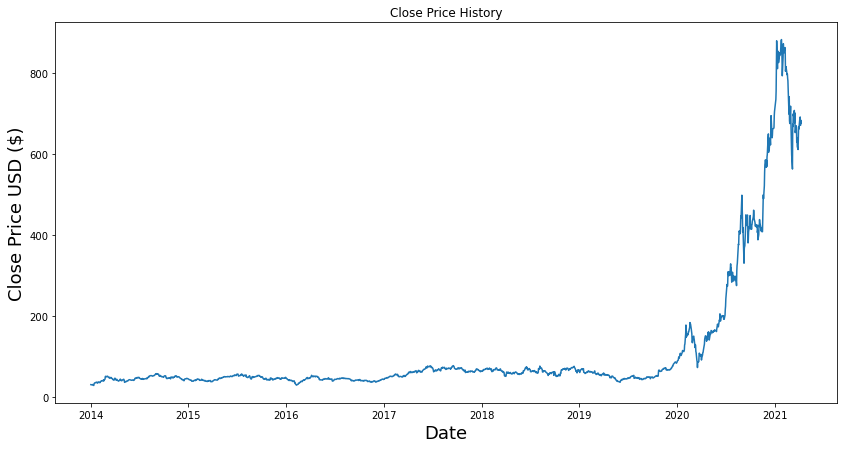

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.title('Close Price History')
plt.plot(tsla['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Setting up periods value n for each indicator 
n = the number of days this indicator is applied on <br /> 
Accumulation: NA<br/>
Exponential Moving Average: n1 = 12, n2 = 26<br/>
Moving Average: n1 = 10, n2 = 50, n3 = 200<br/>
Momentum: n = 10<br/>
Rate of Change: n = 12<br/>
Weighted Moving Average: n= 10<br/>
Aroon: n = 25<br/>
Average True Range: n = 14<br />
Bollinger Bands: n1 = 10, n2 = 20, n3 = 50<br />
Commodity Channel Index: n1 = 30, n2 = 40, n3 = 50<br />
Chande Momentum Oscillator: n = 20<br />
Chaikin Oscillator: NA<br/>
Detrended Price Oscillator: 20<br />
Ichimoku Cloud: NA<br />
KST Oscillator: n_1 = 10, n_2 = 15, n_3 = 25, n_4 = 30<br />
Money Flow Index: n = 14<br />
Moving Average Convergence Divergence: NA<br />
On Balance Volume: NA<br />
Relative Strength Index: n = 14<br />
Ultimate Oscillator: NA<br />
Volume Index: NA<br />
Volume Oscillator: n_1 = 14, n_2 = 28<br />
Williams Percent: n = 14

In [29]:
# Accumulation Distribution
tsla_1["Accumulation Distribution"] = accumulation_distribution(tsla_1)
# Exponential Moving Average
tsla_1["ema_12"] = exponential_moving_average(tsla_1, 12)
tsla_1["ema_26"] = exponential_moving_average(tsla_1, 26)
# Moving Average
tsla_1["ma_10"] = moving_average(tsla_1, 10)
tsla_1["ma_50"] = moving_average(tsla_1, 50)
tsla_1["ma_100"] = moving_average(tsla_1, 100)
# Momentum
tsla_1["Momentum"] = momentum(tsla_1, 10)
# Rate of Change
tsla_1["Rate of Change"] = rate_of_change(tsla_1, 12)
# Weighted Moving Average
tsla_1["Weighted Moving Average"] = weighted_moving_average(tsla_1, 10)
# Aroon
tsla_1 = aroon(tsla_1, 25)
# Average True Range
tsla_1 = average_true_range(tsla_1, 14)
# Bollinger Bands
tsla_1 = bollinger_bands(tsla_1, 10, "short")
tsla_1 = bollinger_bands(tsla_1, 20, "medium")
tsla_1 = bollinger_bands(tsla_1, 50, "long")
# Commodity Channel Index
tsla_1 = commodity_channel_index(tsla_1, 30)
tsla_1 = commodity_channel_index(tsla_1, 40)
tsla_1 = commodity_channel_index(tsla_1, 50)
# Chande Momentum Oscillator
tsla_1 = chande_momentum_oscillator(tsla_1, 20)
# Chaikin Oscillator
tsla_1 = chaikin_oscillator(tsla_1)
# Detrended Price Oscillator
tsla_1 = detrended_price_oscillator(tsla_1, 20)
# Ichimoku Cloud
tsla_1 = ichimoku_cloud(tsla_1)
# Know Sure Thing (KST Oscillator)
tsla_1 = kst_oscillator(tsla_1, 10, 15, 25, 30)
# Money Flow Index
tsla_1 = money_flow_index(tsla_1, 14)
# Moving Average Convergence Divergence
tsla_1 = macd(tsla_1)
# On Balance Volume
tsla_1 = on_balance_volume(tsla_1)
# Relative Strength Index
tsla_1 = relative_strength_index(tsla_1, 14)
# Ultimate Oscillator
tsla_1 = ultimate_oscillator(tsla_1)
# Volume Index
tsla_1 = volume_index(tsla_1)
# Volume Oscillator
tsla_1= volume_oscillator(tsla_1, 14, 28)
# Williams Percent
tsla_1 = william_percent(tsla_1, 14)
tsla_1

,High,Low,Open,Close,Volume,Adj Close,Accumulation Distribution,ema_12,ema_26,ma_10,...,KST_10_15_25_30,Money Flow Index_14,Moving Average Convergence Divergence,On Balance Volume,Relative Strength Index_14,Ultimate Oscillator,positive volume index,negative volume index,Volme Oscillator_14_28,william_14
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000,0.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000e+00,NaN,NaN,1.000000,1.000000,NaN,NaN
2014-01-03,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001,-1.092004e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,-2.347500e+07,NaN,NaN,1.000000,0.996402,NaN,NaN
2014-01-06,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000,-1.943965e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.028050e+07,NaN,NaN,0.982883,0.996402,NaN,NaN
2014-01-07,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000,-4.435104e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,-2.511000e+07,NaN,NaN,0.982883,1.012399,NaN,NaN
2014-01-08,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001,-3.811283e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,5.706001e+06,NaN,NaN,0.995518,1.012399,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988,3.277361e+09,653.753194,657.048960,648.916998,...,-1.402507,42.599578,-3.295766,3.913640e+09,52.640751,28.872353,12.060253,1.908721,-11.355691,0.146052
2021-04-06,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995,3.287270e+09,660.499995,659.796458,651.078998,...,-1.349631,41.506157,0.703537,3.941911e+09,52.730514,25.927839,12.060253,1.910295,-11.331978,0.141186
2021-04-07,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971,3.267957e+09,662.496364,660.074507,651.959998,...,-1.300758,35.139870,2.421857,3.915602e+09,49.099764,22.179884,12.060253,1.853258,-12.792139,0.317456


In [30]:
# removing NaN from columns
tsla_1 = tsla_1.fillna(0)
tsla_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1830 entries, 2014-01-02 to 2021-04-09
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   High                                   1830 non-null   float64
 1   Low                                    1830 non-null   float64
 2   Open                                   1830 non-null   float64
 3   Close                                  1830 non-null   float64
 4   Volume                                 1830 non-null   float64
 5   Adj Close                              1830 non-null   float64
 6   Accumulation Distribution              1830 non-null   float64
 7   ema_12                                 1830 non-null   float64
 8   ema_26                                 1830 non-null   float64
 9   ma_10                                  1830 non-null   float64
 10  ma_50                                  1830 non-null  

In [31]:
tsla_1 = tsla_1.values
tsla_1 = tsla_1.astype('float32')
tsla_1

array([[ 3.0496000e+01,  2.9309999e+01,  2.9959999e+01, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.0438000e+01,  2.9719999e+01,  3.0000000e+01, ...,
         9.9640238e-01,  0.0000000e+00,  0.0000000e+00],
       [ 3.0080000e+01,  2.9048000e+01,  3.0000000e+01, ...,
         9.9640238e-01,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 6.9138000e+02,  6.6784003e+02,  6.8700000e+02, ...,
         1.8532584e+00, -1.2792139e+01,  3.1745636e-01],
       [ 6.8954999e+02,  6.7165002e+02,  6.7738000e+02, ...,
         1.8886957e+00, -1.3123097e+01,  2.0793848e-01],
       [ 6.8096997e+02,  6.6942999e+02,  6.7777002e+02, ...,
         1.8699690e+00, -1.6592035e+01,  2.6581275e-01]], dtype=float32)

### Model A: Training w/o technical indicator on LSTM

In [32]:
import math
from sklearn.preprocessing import MinMaxScaler
tsla_0 = tsla_0.filter(['Close'])
tsla_0 = tsla_0.values
training_data_len = math.ceil(len(tsla_0) * .8)
training_data_len
#Normalization
scaler_0 = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_0.fit_transform(tsla_0)
scaled_data
# Split train and test
train_data_0 = scaled_data[0:training_data_len , :]
x_train_0 = []
y_train_0 = []

for i in range(60, len(train_data_0)):
    x_train_0.append(train_data_0[i-60:i, 0])
    y_train_0.append(train_data_0[i, 0])

x_train_0, y_train_0 = np.array(x_train_0), np.array(y_train_0)
x_train_0 = np.reshape(x_train_0, (x_train_0.shape[0], x_train_0.shape[1], 1))
x_train_0.shape

(1404, 60, 1)

In [33]:
test_data_0 = scaled_data[training_data_len - 60: , :]
x_test_0 = []
y_test_0 = tsla_0[training_data_len:, :]
for i in range(60, len(test_data_0)):
    x_test_0.append(test_data_0[i-60:i, 0])
x_test_0 = np.array(x_test_0)
x_test_0 = np.reshape(x_test_0, (x_test_0.shape[0], x_test_0.shape[1], 1))
x_test_0.shape

(366, 60, 1)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model_0 = Sequential()
model_0.add(LSTM(50, return_sequences=True, input_shape=(x_train_0.shape[1], 1)))
model_0.add(LSTM(50, return_sequences=False))
model_0.add(Dense(25))
model_0.add(Dense(1))
model_0.compile(optimizer='adam', loss='mean_squared_error')
model_0.fit(x_train_0, y_train_0, epochs=20, batch_size=32)

Epoch 1/20
44/44 [==============================] - 6s 35ms/step - loss: 2.7815e-04
Epoch 2/20
44/44 [==============================] - 1s 34ms/step - loss: 2.3967e-05
Epoch 3/20
44/44 [==============================] - 1s 33ms/step - loss: 1.7650e-05
Epoch 4/20
44/44 [==============================] - 1s 32ms/step - loss: 1.4384e-05
Epoch 5/20
44/44 [==============================] - 2s 34ms/step - loss: 1.4827e-05
Epoch 6/20
44/44 [==============================] - 1s 33ms/step - loss: 1.3281e-05
Epoch 7/20
44/44 [==============================] - 1s 33ms/step - loss: 1.1816e-05
Epoch 8/20
44/44 [==============================] - 1s 32ms/step - loss: 1.1578e-05
Epoch 9/20
44/44 [==============================] - 1s 32ms/step - loss: 1.0017e-05
Epoch 10/20
44/44 [==============================] - 1s 32ms/step - loss: 1.2479e-05
Epoch 11/20
44/44 [==============================] - 1s 32ms/step - loss: 1.2266e-05
Epoch 12/20
44/44 [==============================] - 1s 32ms/step - loss: 

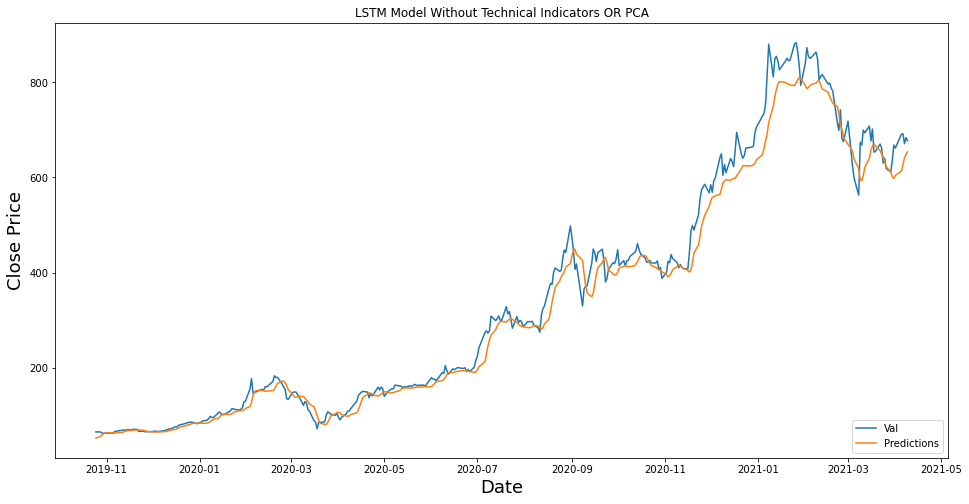

,Close,Predictions
Date,,
2019-10-25,65.625999,52.789375
2019-10-28,65.542000,56.051407
2019-10-29,63.243999,59.537758
2019-10-30,63.001999,61.984573
2019-10-31,62.984001,63.352062
...,...,...
2021-04-05,691.049988,613.250122
2021-04-06,691.619995,627.356750
2021-04-07,670.969971,641.269470


In [35]:
predictions_0 = model_0.predict(x_test_0)
predictions_0 = scaler_0.inverse_transform(predictions_0)
##Plot
data_0 = tsla_2.filter(['Close'])
valid_0 = data_0[training_data_len:]
valid_0['Predictions'] = predictions_0
plt.figure(figsize=(16, 8))
plt.title('LSTM Model Without Technical Indicators OR PCA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid_0[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()
valid_0

In [36]:
rmse_0 = np.sqrt(np.mean(predictions_0 - y_test_0)**2)
from sklearn.metrics import mean_absolute_error
mae_0 = mean_absolute_error(y_test_0, predictions_0)
print(rmse_0, mae_0)

17.164164892311305 22.426674681283085


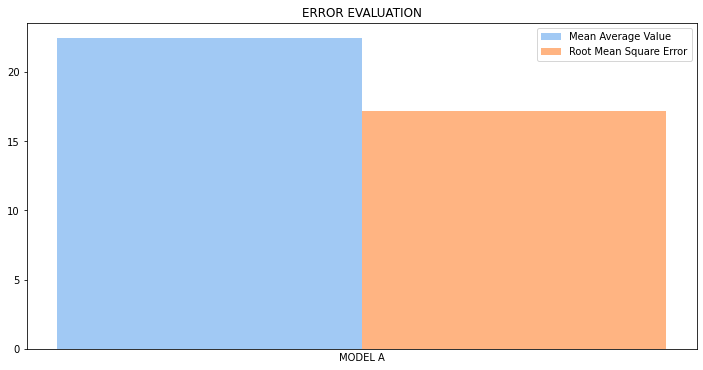

In [37]:
import seaborn as sns
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
MAES = [mae_0]
RMSES = [rmse_0]
RMSES
plt.figure(figsize=(12, 6))
ind = np.arange(len(MAES)) 
width = 0.2
mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
plt.title('ERROR EVALUATION')
plt.xticks(ind)
plt.xlabel('MODEL A')
plt.legend()

### Model B:  LSTM + Indicators

In [38]:
tsla_1 = pd.DataFrame(tsla_1)
tsla_1

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
1,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001,-1.092004e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.347500e+07,0.000000,0.000000,1.000000,0.996402,0.000000,0.000000
2,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000,-1.943965e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-5.028050e+07,0.000000,0.000000,0.982883,0.996402,0.000000,0.000000
3,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000,-4.435104e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.511000e+07,0.000000,0.000000,0.982883,1.012399,0.000000,0.000000
4,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001,-3.811283e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.706001e+06,0.000000,0.000000,0.995518,1.012399,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988,3.277361e+09,653.753174,657.048950,648.916992,...,-1.402507,42.599579,-3.295766,3.913639e+09,52.640751,28.872353,12.060252,1.908721,-11.355691,0.146052
1826,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995,3.287270e+09,660.500000,659.796448,651.078979,...,-1.349631,41.506157,0.703537,3.941911e+09,52.730515,25.927839,12.060252,1.910295,-11.331978,0.141186
1827,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971,3.267956e+09,662.496338,660.074524,651.960022,...,-1.300758,35.139870,2.421857,3.915602e+09,49.099762,22.179884,12.060252,1.853258,-12.792139,0.317456
1828,689.549988,671.650024,677.380005,683.799988,23924300.0,683.799988,3.276510e+09,666.104370,661.801392,657.312988,...,-1.223137,41.800255,4.302986,3.939526e+09,51.341499,22.403175,12.060252,1.888696,-13.123097,0.207938


#### Split test and train dataset 

In [39]:
val = tsla_1.values 
train_sample = math.ceil(len(val) * .8)
train_1 = val[:train_sample, :]
train_1 = pd.DataFrame(train_1)
train_1

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
1,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001,-1.092004e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-23475000.0,0.000000,0.000000,1.000000,0.996402,0.000000,0.000000
2,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000,-1.943965e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-50280500.0,0.000000,0.000000,0.982883,0.996402,0.000000,0.000000
3,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000,-4.435104e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-25110000.0,0.000000,0.000000,0.982883,1.012399,0.000000,0.000000
4,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001,-3.811283e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5706001.0,0.000000,0.000000,0.995518,1.012399,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,52.560001,51.020000,52.139999,51.389999,28749000.0,51.389999,1.313524e+09,50.580395,49.467033,50.168999,...,0.639750,84.260536,1.113362,-451330496.0,61.616379,19.201515,0.817514,2.093982,1.767656,0.193334
1460,51.900002,50.035999,51.666000,50.700001,25101500.0,50.700001,1.306306e+09,50.696850,49.577587,50.484600,...,0.650092,78.639374,1.119262,-476432000.0,57.851097,18.786362,0.817514,2.065866,3.143326,0.278518
1461,51.666000,50.169998,50.863998,51.116001,23004000.0,51.116001,1.312395e+09,50.877014,49.721119,50.795200,...,0.667010,84.223679,1.155894,-453428000.0,59.459591,20.313372,0.817514,2.082817,4.157895,0.227160
1462,51.228001,50.270000,50.900002,50.936001,26305500.0,50.936001,1.322665e+09,50.967331,49.834019,50.998199,...,0.676770,84.851143,1.133312,-479733504.0,58.420715,18.470198,0.814635,2.082817,-5.568192,0.275129


#### Normalization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
train_1 = scaler_1.fit_transform(train_1)
x_train_1 = []
y_train_1 = []
for i in range (60, train_1.shape[0]):
    x_train_1.append(train_1[i-60:i, :])
    #Next day's close price
    y_train_1.append(train_1[i, 3])
x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)
print(x_train_1.shape, y_train_1.shape)
train_1.shape

(1404, 60, 48) (1404,)


(1464, 48)

In [41]:
test_1 = val[train_sample - 60: , :]
test_1 = scaler_1.fit_transform(test_1)
x_test_1 = []
y_test_1 = []
for i in range (60, test_1.shape[0]):
    x_test_1.append(test_1[i-60:i, :])
    y_test_1.append(test_1[i, 3])
x_test_1 = np.array(x_test_1)
y_test_1 = np.array(y_test_1)
print(x_test_1.shape, y_test_1.shape)

(366, 60, 48) (366,)


#### Building LSTM

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(x_train_1.shape[1], x_train_1.shape[2])))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mean_squared_error')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            19800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
44/44 [==============================] - 8s 78ms/step - loss: 0.2032 - val_loss: 0.2111
Epoch 2/20
44/44 [==============================] - 2s 35ms/step - loss: 0.1054 - val_loss: 0.2175
Epoch 3/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0718 - val_loss: 0.1324
Epoch 4/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0612 - val_loss: 0.1012
Epoch 5/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0584 - val_loss: 0.1291
Epoch 6/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0431 - val_loss: 0.1095
Epoch 7/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0448 - val_loss: 0.1266
Epoch 8/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0644 - val_loss: 0.1267
Epoch 9/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0443 - val_loss: 0.1527
Epoch 10/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0418 - val_loss: 0.0858
Epoch 11/

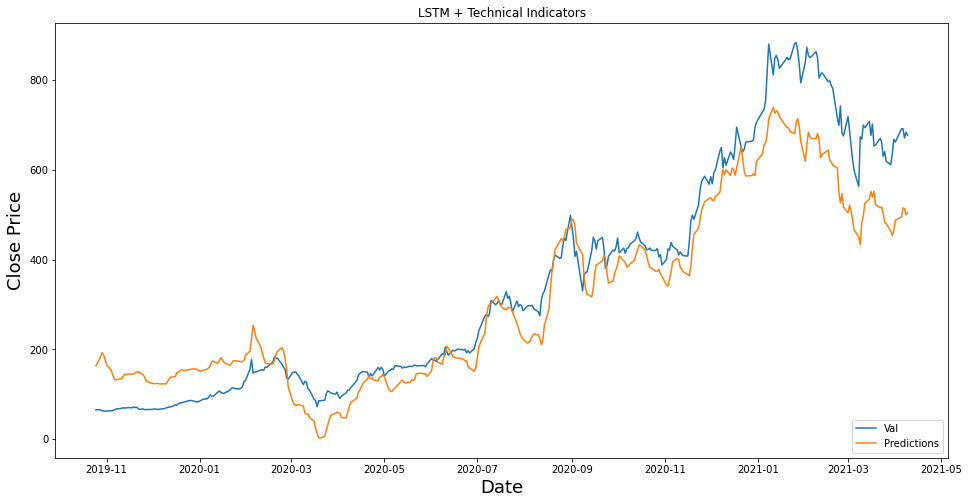

,Close,Predictions
Date,,
2019-10-25,65.625999,163.241363
2019-10-28,65.542000,183.194813
2019-10-29,63.243999,192.440214
2019-10-30,63.001999,188.412924
2019-10-31,62.984001,177.931937
...,...,...
2021-04-05,691.049988,494.987730
2021-04-06,691.619995,515.083441
2021-04-07,670.969971,513.579570


In [43]:
model_1.fit(x_train_1, y_train_1, epochs=20, batch_size=32, validation_data=(x_test_1, y_test_1), shuffle=False)
predictions_1 = model_1.predict(x_test_1)
# create empty table with n fields
trainPredict_dataset_like = np.zeros(shape=(len(predictions_1), train_1.shape[1]) )
trainPredict_dataset_like[:,3] = predictions_1[:,0]
prediction_values = scaler_1.inverse_transform(trainPredict_dataset_like)
predicted_close = prediction_values[:, 3]
##Plot
data_1 = tsla_2.filter(['Close'])
valid_1 = data_1[train_sample:]
valid_1['Predictions'] = predicted_close
plt.figure(figsize=(16, 8))
plt.title('LSTM + Technical Indicators')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid_1[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()
valid_1

In [44]:
rmse_1 = np.sqrt(np.mean(predicted_close - y_test_1)**2)
rmse_1
mae_1 = mean_absolute_error(y_test_1, predicted_close)
print(rmse_1, mae_1)

310.9469534615019 310.9469534615019


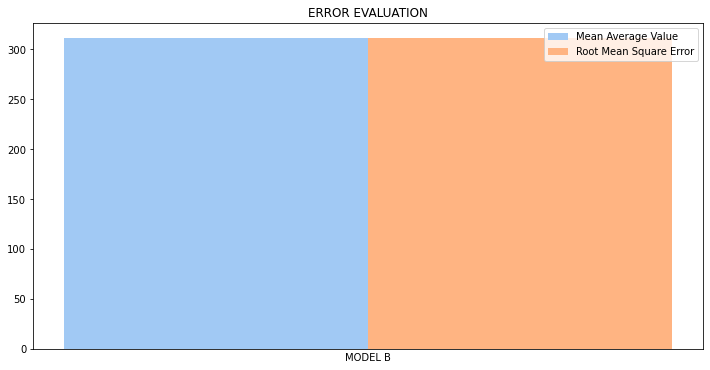

In [45]:
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
MAES = [mae_1]
RMSES = [rmse_1]
RMSES
plt.figure(figsize=(12, 6))
ind = np.arange(len(MAES)) 
width = 0.2
mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
plt.title('ERROR EVALUATION')
plt.xticks(ind)
plt.xlabel('MODEL B')
plt.legend()

## Data Selection. Principle Component Analysis 

#### Applying PCA on all attributes including open, close, high, low

In [46]:
from sklearn.decomposition import PCA
pca_x_train = []
pca_y_train = []
for i in range (0, train_1.shape[0]):
    pca_x_train.append(train_1[i, :])
for i in range (60, train_1.shape[0]):
    pca_y_train.append(train_1[i, 3])
pca_x_train = np.array(pca_x_train)
pca_y_train = np.array(pca_y_train)
pca_x_test = []
pca_y_test = []
for i in range (0, test_1.shape[0]):
    pca_x_test.append(test_1[i, :])
for i in range (60, test_1.shape[0]):
    pca_y_test.append(test_1[i, 3])
pca_x_test = np.array(pca_x_test)
pca_y_test = np.array(pca_y_test)
print(pca_x_train.shape, pca_y_train.shape, pca_x_test.shape, pca_y_test.shape)

(1464, 48) (1404,) (426, 48) (366,)


##### Get the variance ratios

In [47]:
pca = PCA()
pca_x_train = pca.fit_transform(pca_x_train)
pca_x_test = pca.transform(pca_x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.96823013e-01, 2.18818143e-01, 6.12957925e-02, 4.03391160e-02,
       3.58010195e-02, 2.04815622e-02, 1.86625067e-02, 1.63187850e-02,
       1.34192063e-02, 1.18570998e-02, 9.59518924e-03, 9.38754249e-03,
       7.26386672e-03, 5.77990850e-03, 5.61668305e-03, 4.36689565e-03,
       4.09360882e-03, 3.81537923e-03, 2.64968770e-03, 2.60604010e-03,
       2.27592792e-03, 1.48401072e-03, 1.06561079e-03, 9.78125841e-04,
       8.39212851e-04, 7.59401242e-04, 7.34082656e-04, 6.57211989e-04,
       4.80117393e-04, 3.24447261e-04, 3.01051885e-04, 2.56984669e-04,
       2.38637847e-04, 1.71803636e-04, 1.34188929e-04, 1.13835515e-04,
       8.26389005e-05, 5.42142407e-05, 3.31711562e-05, 1.41422461e-05,
       1.00272764e-05, 1.79630590e-07, 1.58173514e-15, 1.58173514e-15,
       1.58173514e-15, 1.58173514e-15, 1.58173514e-15, 1.58173450e-15],
      dtype=float32)

##### Let's keep the first 24 principle components which are responsible of more than 99% variance

In [48]:
pca = PCA(n_components=24)
pca_x_train = pca.fit_transform(pca_x_train)
pca_x_test = pca.transform(pca_x_test)
fpca_x_train = []
fpca_x_test = []
# Convert the dataformat back into 3-dimensional for LSTM
for i in range (60, pca_x_train.shape[0]):
    fpca_x_train.append(pca_x_train[i-60:i, :])
for i in range (60, pca_x_test.shape[0]):
    fpca_x_test.append(pca_x_test[i-60:i, :])
fpca_x_train = np.array(fpca_x_train)
fpca_x_test = np.array(fpca_x_test)
print(fpca_x_train.shape, fpca_x_test.shape)

(1404, 60, 24) (366, 60, 24)


### Model C: Train the model on basic attributes + technical indicators with PCA

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(fpca_x_train.shape[1], fpca_x_train.shape[2])))
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            15000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 36,501
Trainable params: 36,501
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
44/44 [==============================] - 7s 68ms/step - loss: 0.1743 - val_loss: 0.1504
Epoch 2/20
44/44 [==============================] - 2s 35ms/step - loss: 0.1231 - val_loss: 0.1539
Epoch 3/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0717 - val_loss: 0.1833
Epoch 4/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0636 - val_loss: 0.0706
Epoch 5/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0629 - val_loss: 0.0850
Epoch 6/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0377 - val_loss: 0.0909
Epoch 7/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0537 - val_loss: 0.1622
Epoch 8/20
44/44 [==============================] - 2s 34ms/step - loss: 0.0447 - val_loss: 0.0802
Epoch 9/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0448 - val_loss: 0.1762
Epoch 10/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0601 - val_loss: 0.0794
Epoch 11/

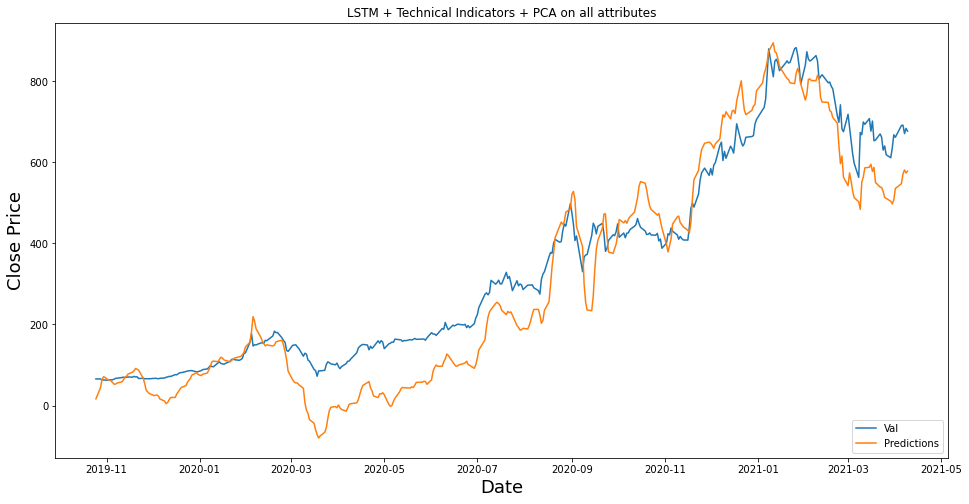

,Close,Predictions
Date,,
2019-10-25,65.625999,16.492549
2019-10-28,65.542000,43.860744
2019-10-29,63.243999,64.249584
2019-10-30,63.001999,70.979155
2019-10-31,62.984001,69.431773
...,...,...
2021-04-05,691.049988,547.456716
2021-04-06,691.619995,571.085079
2021-04-07,670.969971,580.991059


In [50]:
model_2.fit(fpca_x_train, pca_y_train, epochs=20, batch_size=32, validation_data=(fpca_x_test, pca_y_test), shuffle=False)
predictions_2 = model_2.predict(fpca_x_test)
# create empty table with n fields
trainPredict_dataset_like_2 = np.zeros(shape=(len(predictions_2), train_1.shape[1]) )
trainPredict_dataset_like_2[:,3] = predictions_2[:,0]
prediction_values_2 = scaler_1.inverse_transform(trainPredict_dataset_like_2)
predicted_close_2 = prediction_values_2[:, 3]
##Plot
data_2 = tsla_2.filter(['Close'])
valid_2 = data_2[train_sample:]
valid_2['Predictions'] = predicted_close_2
plt.figure(figsize=(16, 8))
plt.title('LSTM + Technical Indicators + PCA on all attributes')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid_2[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()
valid_2

In [51]:
rmse_2 = np.sqrt(np.mean(predicted_close_2 - pca_y_test)**2)
mae_2 = mean_absolute_error(pca_y_test, predicted_close_2)
print(rmse_2, mae_2)

305.1648779041728 308.421696577537


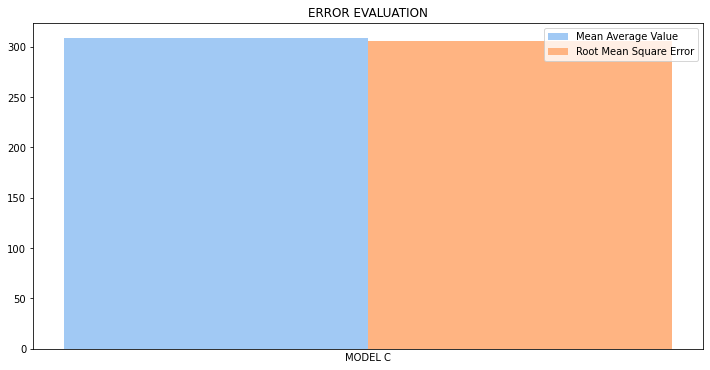

In [52]:
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
MAES = [mae_2]
RMSES = [rmse_2]
RMSES
plt.figure(figsize=(12, 6))
ind = np.arange(len(MAES)) 
width = 0.2
mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
plt.title('ERROR EVALUATION')
plt.xticks(ind)
plt.xlabel('MODEL C')
plt.legend()

### Model D: Reserve Basic Stock Attributes + PCA on Technical Indicators

In [53]:
train_1.shape
test_1.shape
train_1[:,0:6].shape

(1464, 6)

In [54]:
pca_x_train_2 = []
pca_y_train_2 = []
for i in range (0, train_1.shape[0]):
    ## Reseve the basic attributes including High, Low, Open, Close, Volume, Adj Close 
    pca_x_train_2.append(train_1[i, 6:])
for i in range (60, train_1.shape[0]):
    pca_y_train_2.append(train_1[i, 3])
pca_x_train_2 = np.array(pca_x_train_2)
pca_y_train_2 = np.array(pca_y_train_2)

pca_x_test_2 = []
pca_y_test_2 = []
for i in range (0, test_1.shape[0]):
    pca_x_test_2.append(test_1[i, 6:])
for i in range (60, test_1.shape[0]):
    pca_y_test_2.append(test_1[i, 3])
pca_x_test_2 = np.array(pca_x_test_2)
pca_y_test_2 = np.array(pca_y_test_2)

print(pca_x_train_2.shape, pca_y_train_2.shape, pca_x_test_2.shape, pca_y_test_2.shape)

(1464, 42) (1404,) (426, 42) (366,)


In [55]:
pca_2 = PCA()
pca_x_train_2 = pca_2.fit_transform(pca_x_train)
pca_x_test_2 = pca_2.transform(pca_x_test)
explained_variance_2 = pca_2.explained_variance_ratio_
explained_variance_2

array([0.49942228, 0.21996334, 0.06161661, 0.04055024, 0.03598831,
       0.02058871, 0.01876018, 0.01640415, 0.01348942, 0.01191914,
       0.00964539, 0.00943668, 0.00730187, 0.00581015, 0.00564607,
       0.00438975, 0.00411504, 0.00383534, 0.00266355, 0.00261968,
       0.00228784, 0.00149178, 0.00107119, 0.00098324], dtype=float32)

#### Let's keep the first 11 principal components since they take around 99%

In [56]:
pca_2 = PCA(n_components=11)
pca_x_train_2 = pca_2.fit_transform(pca_x_train_2)
pca_x_test_2 = pca_2.transform(pca_x_test_2)
print(pca_x_train_2.shape, pca_x_test_2.shape)

(1464, 11) (426, 11)


#### Concatnate the extracted PCs with the basic attributes

In [57]:
pca_x_train_2c = np.concatenate((train_1[:,0:6], pca_x_train_2), axis = 1)
pca_x_test_2c = np.concatenate((test_1[:,0:6], pca_x_test_2), axis = 1)
pca_x_test_2c.shape

(426, 17)

In [58]:
fpca_x_train_2 = []
fpca_x_test_2 = []
# Convert the dataformat back into 3-dimensional for LSTM
for i in range (60, pca_x_train_2c.shape[0]):
    fpca_x_train_2.append(pca_x_train_2c[i-60:i, :])
for i in range (60, pca_x_test.shape[0]):
    fpca_x_test_2.append(pca_x_test_2c[i-60:i, :])
fpca_x_train_2 = np.array(fpca_x_train_2)
fpca_x_test_2 = np.array(fpca_x_test_2)
print(fpca_x_train_2.shape, fpca_x_test_2.shape)

(1404, 60, 17) (366, 60, 17)


In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model_3 = Sequential()
model_3.add(LSTM(50, return_sequences=True, input_shape=(fpca_x_train_2.shape[1], fpca_x_train_2.shape[2])))
model_3.add(LSTM(50, return_sequences=False))
model_3.add(Dense(25))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='mean_squared_error')
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            13600     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 35,101
Trainable params: 35,101
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
44/44 [==============================] - 7s 58ms/step - loss: 0.3705 - val_loss: 0.1198
Epoch 2/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0951 - val_loss: 0.1251
Epoch 3/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0741 - val_loss: 0.1069
Epoch 4/20
44/44 [==============================] - 2s 38ms/step - loss: 0.0699 - val_loss: 0.0805
Epoch 5/20
44/44 [==============================] - 2s 38ms/step - loss: 0.0620 - val_loss: 0.1022
Epoch 6/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0571 - val_loss: 0.0672
Epoch 7/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0371 - val_loss: 0.0642
Epoch 8/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0328 - val_loss: 0.0457
Epoch 9/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0303 - val_loss: 0.0775
Epoch 10/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0291 - val_loss: 0.0755
Epoch 11/

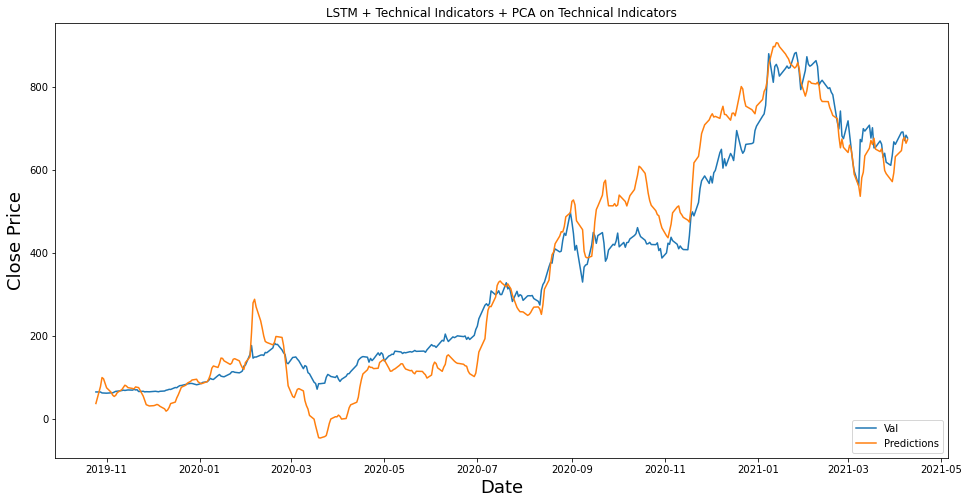

,Close,Predictions
Date,,
2019-10-25,65.625999,37.830249
2019-10-28,65.542000,78.784525
2019-10-29,63.243999,100.336231
2019-10-30,63.001999,97.364403
2019-10-31,62.984001,86.591194
...,...,...
2021-04-05,691.049988,646.750217
2021-04-06,691.619995,673.267403
2021-04-07,670.969971,678.644704


In [60]:
model_3.fit(fpca_x_train_2, pca_y_train_2, epochs=20, batch_size=32, validation_data=(fpca_x_test_2, pca_y_test_2), shuffle=False)
predictions_3 = model_3.predict(fpca_x_test_2)
# create empty table with n fields
trainPredict_dataset_like_3 = np.zeros(shape=(len(predictions_3), train_1.shape[1]) )
trainPredict_dataset_like_3[:,3] = predictions_3[:,0]
prediction_values_3 = scaler_1.inverse_transform(trainPredict_dataset_like_3)
predicted_close_3 = prediction_values_3[:, 3]
##Plot
data_3 = tsla_2.filter(['Close'])
valid_3 = data_2[train_sample:]
valid_3['Predictions'] = predicted_close_3
plt.figure(figsize=(16, 8))
plt.title('LSTM + Technical Indicators + PCA on Technical Indicators')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid_3[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()
valid_3

In [61]:
rmse_3 = np.sqrt(np.mean(predicted_close_3 - pca_y_test_2)**2)
mae_3 = mean_absolute_error(pca_y_test_2, predicted_close_3)
print(rmse_3, mae_3)

348.79307550538596 350.1361026884461


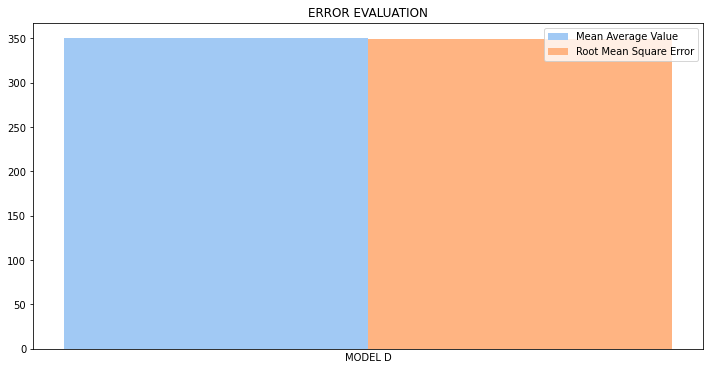

In [62]:
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
MAES = [mae_3]
RMSES = [rmse_3]
RMSES
plt.figure(figsize=(12, 6))
ind = np.arange(len(MAES)) 
width = 0.2
mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
plt.title('ERROR EVALUATION')
plt.xticks(ind)
plt.xlabel('MODEL D')
plt.legend()

## Model Comparisions 

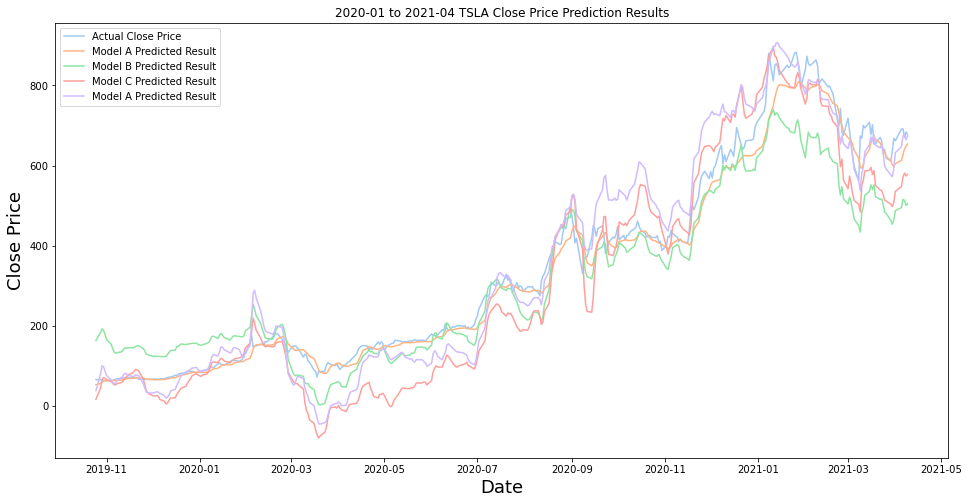

In [63]:
import seaborn as sns
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
plt.figure(figsize=(16, 8))
plt.plot(valid_0[['Close']], color = p1, label = 'Actual Close Price')
plt.plot(valid_0[['Predictions']], color = p2, label = 'Model A Predicted Result')
plt.plot(valid_1[['Predictions']], color = p3, label = 'Model B Predicted Result')
plt.plot(valid_2[['Predictions']], color = p4, label = 'Model C Predicted Result')
plt.plot(valid_3[['Predictions']], color = p5, label = 'Model A Predicted Result')
plt.title('2020-01 to 2021-04 TSLA Close Price Prediction Results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

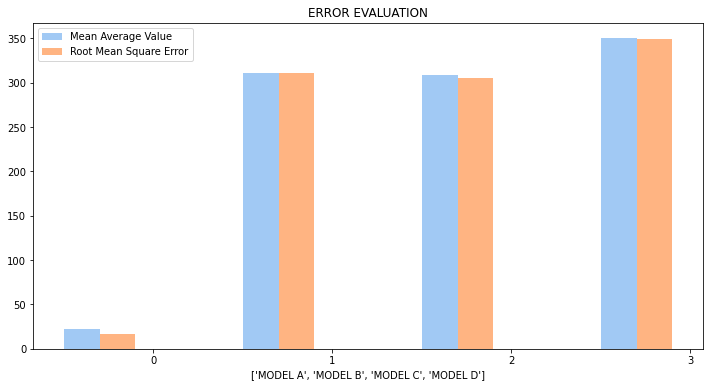

In [64]:
p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
MAES = [mae_0, mae_1, mae_2, mae_3]
RMSES = [rmse_0, rmse_1, rmse_2, rmse_3]
RMSES
plt.figure(figsize=(12, 6))
ind = np.arange(len(MAES)) 
width = 0.2
mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
plt.title('ERROR EVALUATION')
plt.xticks(ind)
plt.xlabel(['MODEL A', 'MODEL B', 'MODEL C', 'MODEL D'])
plt.legend()

Text(0, 0.5, 'TSLA Stock Price')

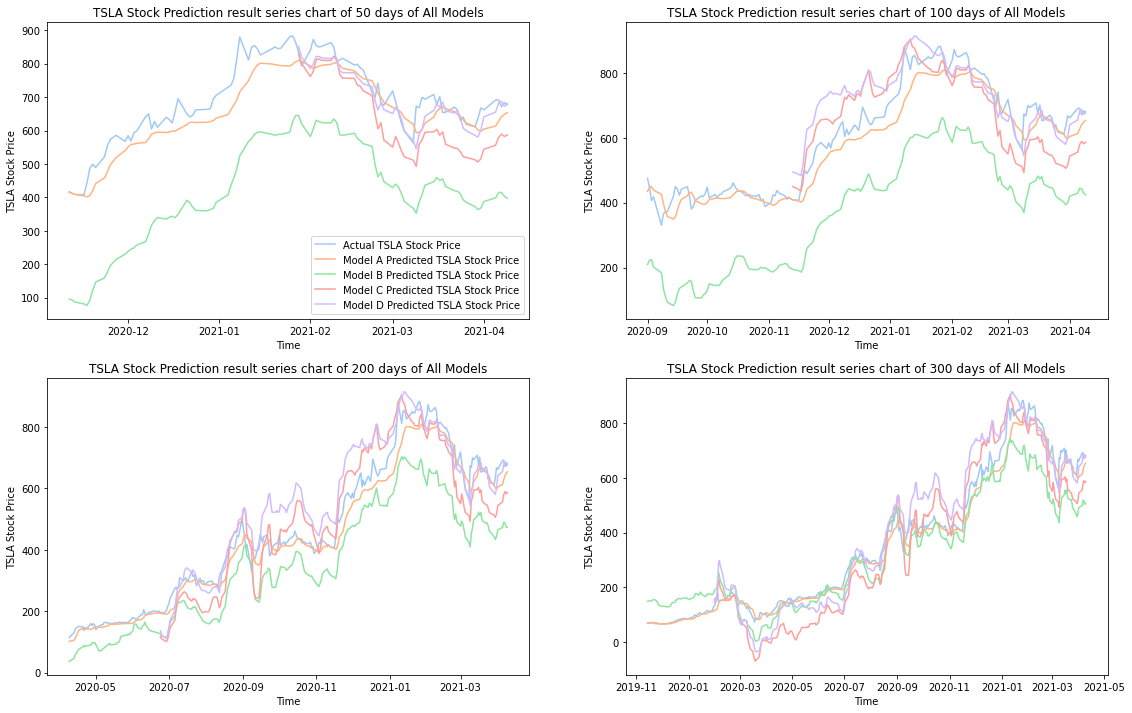

In [65]:
## Test Model A for 50, 100, 200, 400 days
## MODEL A
vtest_A_50 = scaled_data[training_data_len + 204: , :]
vx_test_A50 = []
vy_test_A50 = vtest_A_50[training_data_len + 204:, :]
for i in range(60, len(vtest_A_50)):
    vx_test_A50.append(vtest_A_50[i-60:i, 0])
vx_test_A50 = np.array(vx_test_A50)
vx_test_A50 = np.reshape(vx_test_A50, (vx_test_A50.shape[0], vx_test_A50.shape[1], 1))
vx_test_A50.shape

vtest_A_100 = scaled_data[training_data_len + 154: , :]
vx_test_A100 = []
vy_test_A100 = vtest_A_100[training_data_len + 154:, :]
for i in range(60, len(vtest_A_100)):
    vx_test_A100.append(vtest_A_100[i-60:i, 0])
vx_test_A100 = np.array(vx_test_A100)
vx_test_A100 = np.reshape(vx_test_A100, (vx_test_A100.shape[0], vx_test_A100.shape[1], 1))
vx_test_A100.shape

vtest_A_200 = scaled_data[training_data_len + 54: , :]
vx_test_A200 = []
vy_test_A200 = vtest_A_200[training_data_len + 54:, :]
for i in range(60, len(vtest_A_200)):
    vx_test_A200.append(vtest_A_200[i-60:i, 0])
vx_test_A200 = np.array(vx_test_A200)
vx_test_A200 = np.reshape(vx_test_A200, (vx_test_A200.shape[0], vx_test_A200.shape[1], 1))
vx_test_A200.shape

vtest_A_400 = scaled_data[training_data_len - 46: , :]
vx_test_A400 = []
vy_test_A400 = vtest_A_400[training_data_len - 46:, :]
for i in range(60, len(vtest_A_400)):
    vx_test_A400.append(vtest_A_400[i-60:i, 0])
vx_test_A400 = np.array(vx_test_A400)
vx_test_A400 = np.reshape(vx_test_A400, (vx_test_A400.shape[0], vx_test_A400.shape[1], 1))
vx_test_A400.shape

#MODEL B
vtest_B_50 = val[train_sample + 204: , :]
vtest_B_50 = scaler_1.fit_transform(vtest_B_50)
vx_test_B50 = []
vy_test_B50 = []
for i in range (60, vtest_B_50.shape[0]):
    vx_test_B50.append(vtest_B_50[i-60:i, :])
    vy_test_B50.append(vtest_B_50[i, 3])
vx_test_B50 = np.array(vx_test_B50)
vy_test_B50 = np.array(vy_test_B50)
vx_test_B50.shape

vtest_B_100 = val[train_sample + 154: , :]
vtest_B_100 = scaler_1.fit_transform(vtest_B_100)
vx_test_B100 = []
vy_test_B100 = []
for i in range (60, vtest_B_100.shape[0]):
    vx_test_B100.append(vtest_B_100[i-60:i, :])
    vy_test_B100.append(vtest_B_100[i, 3])
vx_test_B100 = np.array(vx_test_B100)
vy_test_B100 = np.array(vy_test_B100)

vtest_B_200 = val[train_sample + 54: , :]
vtest_B_200 = scaler_1.fit_transform(vtest_B_200)
vx_test_B200 = []
vy_test_B200 = []
for i in range (60, vtest_B_200.shape[0]):
    vx_test_B200.append(vtest_B_200[i-60:i, :])
    vy_test_B200.append(vtest_B_200[i, 3])
vx_test_B200 = np.array(vx_test_B200)
vy_test_B200 = np.array(vy_test_B200)
vx_test_B200.shape

vtest_B_400 = val[train_sample - 46: , :]
vtest_B_400 = scaler_1.fit_transform(vtest_B_400)
vx_test_B400 = []
vy_test_B400 = []
for i in range (60, vtest_B_400.shape[0]):
    vx_test_B400.append(vtest_B_400[i-60:i, :])
    vy_test_B400.append(vtest_B_400[i, 3])
vx_test_B400 = np.array(vx_test_B400)
vy_test_B400 = np.array(vy_test_B400)
vx_test_B400.shape

#MODEL C
vtest_C_50 = fpca_x_test[-50: , :]
vtest_C_100 = fpca_x_test[-100: , :]
vtest_C_200 = fpca_x_test[-200: , :]
vtest_C_300 = fpca_x_test[-300: , :]

#MODEL D
vtest_D_50 = fpca_x_test_2[-50: , :]
vtest_D_100 = fpca_x_test_2[-100: , :]
vtest_D_200 = fpca_x_test_2[-200: , :]
vtest_D_300 = fpca_x_test_2[-300: , :]

predictions_A50 = model_0.predict(vx_test_A50)
predictions_A50 = scaler_0.inverse_transform(predictions_A50)
valid_A50 = data_0[training_data_len + 264:]
valid_A50['Predictions'] = predictions_A50

predictions_A100 = model_0.predict(vx_test_A100)
predictions_A100 = scaler_0.inverse_transform(predictions_A100)
valid_A100 = data_0[training_data_len + 214:]
valid_A100['Predictions'] = predictions_A100

predictions_A200 = model_0.predict(vx_test_A200)
predictions_A200 = scaler_0.inverse_transform(predictions_A200)
valid_A200 = data_0[training_data_len + 114:]
valid_A200['Predictions'] = predictions_A200
valid_A200

predictions_A300 = model_0.predict(vx_test_A400)
predictions_A300 = scaler_0.inverse_transform(predictions_A300)
valid_A300 = data_0[training_data_len + 14:]
valid_A300['Predictions'] = predictions_A300
valid_A300

# MODEL B
predictions_B50 = model_1.predict(vx_test_B50)
trainPredict_dataset_like_B50 = np.zeros(shape=(len(predictions_B50), train_1.shape[1]) )
trainPredict_dataset_like_B50[:,3] = predictions_B50[:,0]
prediction_values_B50 = scaler_1.inverse_transform(trainPredict_dataset_like_B50)
predicted_close_B50 = prediction_values_B50[:, 3]
valid_B50 = data_1[train_sample+264:]
valid_B50['Predictions'] = predicted_close_B50

predictions_B100 = model_1.predict(vx_test_B100)
trainPredict_dataset_like_B100 = np.zeros(shape=(len(predictions_B100), train_1.shape[1]) )
trainPredict_dataset_like_B100[:,3] = predictions_B100[:,0]
prediction_values_B100 = scaler_1.inverse_transform(trainPredict_dataset_like_B100)
predicted_close_B100 = prediction_values_B100[:, 3]
valid_B100 = data_1[train_sample+214:]
valid_B100['Predictions'] = predicted_close_B100

predictions_B200 = model_1.predict(vx_test_B200)
trainPredict_dataset_like_B200 = np.zeros(shape=(len(predictions_B200), train_1.shape[1]) )
trainPredict_dataset_like_B200[:,3] = predictions_B200[:,0]
prediction_values_B200 = scaler_1.inverse_transform(trainPredict_dataset_like_B200)
predicted_close_B200 = prediction_values_B200[:, 3]
valid_B200 = data_1[train_sample+114:]
valid_B200['Predictions'] = predicted_close_B200

predictions_B300 = model_1.predict(vx_test_B400)
trainPredict_dataset_like_B300 = np.zeros(shape=(len(predictions_B300), train_1.shape[1]) )
trainPredict_dataset_like_B300[:,3] = predictions_B300[:,0]
prediction_values_B300 = scaler_1.inverse_transform(trainPredict_dataset_like_B300)
predicted_close_B300 = prediction_values_B300[:, 3]
valid_B300 = data_1[train_sample+14:]
valid_B300['Predictions'] = predicted_close_B300

#MODEL C
predictions_C50 = model_2.predict(vtest_C_50)
trainPredict_dataset_like_C50 = np.zeros(shape=(len(predictions_C50), train_1.shape[1]) )
trainPredict_dataset_like_C50[:,3] = predictions_C50[:,0]
prediction_values_C50 = scaler_1.inverse_transform(trainPredict_dataset_like_C50)
predicted_close_C50 = prediction_values_C50[:, 3]
valid_C50 = data_2[-50:]
valid_C50['Predictions'] = predicted_close_C50

predictions_C100 = model_2.predict(vtest_C_100)
trainPredict_dataset_like_C100 = np.zeros(shape=(len(predictions_C100), train_1.shape[1]) )
trainPredict_dataset_like_C100[:,3] = predictions_C100[:,0]
prediction_values_C100 = scaler_1.inverse_transform(trainPredict_dataset_like_C100)
predicted_close_C100 = prediction_values_C100[:, 3]
valid_C100 = data_2[-100:]
valid_C100['Predictions'] = predicted_close_C100

predictions_C200 = model_2.predict(vtest_C_200)
trainPredict_dataset_like_C200 = np.zeros(shape=(len(predictions_C200), train_1.shape[1]) )
trainPredict_dataset_like_C200[:,3] = predictions_C200[:,0]
prediction_values_C200 = scaler_1.inverse_transform(trainPredict_dataset_like_C200)
predicted_close_C200 = prediction_values_C200[:, 3]
valid_C200 = data_2[-200:]
valid_C200['Predictions'] = predicted_close_C200

predictions_C300 = model_2.predict(vtest_C_300)
trainPredict_dataset_like_C300 = np.zeros(shape=(len(predictions_C300), train_1.shape[1]) )
trainPredict_dataset_like_C300[:,3] = predictions_C300[:,0]
prediction_values_C300 = scaler_1.inverse_transform(trainPredict_dataset_like_C300)
predicted_close_C300 = prediction_values_C300[:, 3]
valid_C300 = data_2[-300:]
valid_C300['Predictions'] = predicted_close_C300

#MODEL D
predictions_D50 = model_3.predict(vtest_D_50)
trainPredict_dataset_like_D50 = np.zeros(shape=(len(predictions_D50), train_1.shape[1]) )
trainPredict_dataset_like_D50[:,3] = predictions_D50[:,0]
prediction_values_D50 = scaler_1.inverse_transform(trainPredict_dataset_like_D50)
predicted_close_D50 = prediction_values_D50[:, 3]
valid_D50 = data_2[-50:]
valid_D50['Predictions'] = predicted_close_D50

predictions_D100 = model_3.predict(vtest_D_100)
trainPredict_dataset_like_D100 = np.zeros(shape=(len(predictions_D100), train_1.shape[1]) )
trainPredict_dataset_like_D100[:,3] = predictions_D100[:,0]
prediction_values_D100 = scaler_1.inverse_transform(trainPredict_dataset_like_D100)
predicted_close_D100 = prediction_values_D100[:, 3]
valid_D100 = data_2[-100:]
valid_D100['Predictions'] = predicted_close_D100

predictions_D200 = model_3.predict(vtest_D_200)
trainPredict_dataset_like_D200 = np.zeros(shape=(len(predictions_D200), train_1.shape[1]) )
trainPredict_dataset_like_D200[:,3] = predictions_D200[:,0]
prediction_values_D200 = scaler_1.inverse_transform(trainPredict_dataset_like_D200)
predicted_close_D200 = prediction_values_D200[:, 3]
valid_D200 = data_2[-200:]
valid_D200['Predictions'] = predicted_close_D200

predictions_D300 = model_3.predict(vtest_D_300)
trainPredict_dataset_like_D300 = np.zeros(shape=(len(predictions_D300), train_1.shape[1]) )
trainPredict_dataset_like_D300[:,3] = predictions_D300[:,0]
prediction_values_D300 = scaler_1.inverse_transform(trainPredict_dataset_like_D300)
predicted_close_D300 = prediction_values_D300[:, 3]
valid_D300 = data_2[-300:]
valid_D300['Predictions'] = predicted_close_D300
##valid_D300

c1, c2, c3,c4,c5 = sns.color_palette("pastel", 5)

fig1 = plt.figure(figsize=[19,12])
ax1 = fig1.add_subplot(221)
ax1.plot(valid_A50['Close'], color = c1, label = 'Actual TSLA Stock Price')
ax1.plot(valid_A50['Predictions'], color = c2, label = 'Model A Predicted TSLA Stock Price')
ax1.plot(valid_B50['Predictions'], color = c3, label = 'Model B Predicted TSLA Stock Price')
ax1.plot(valid_C50['Predictions'], color = c4, label = 'Model C Predicted TSLA Stock Price')
ax1.plot(valid_D50['Predictions'], color = c5, label = 'Model D Predicted TSLA Stock Price')
ax1.set_title('TSLA Stock Prediction result series chart of 50 days of All Models')
ax1.set_xlabel('Time')
ax1.set_ylabel('TSLA Stock Price')
ax1.legend()

ax2 = fig1.add_subplot(222)
ax2.plot(valid_A100['Close'], color = c1, label = 'Actual TSLA Stock Price')
ax2.plot(valid_A100['Predictions'], color = c2, label = 'Model A Predicted TSLA Stock Price')
ax2.plot(valid_B100['Predictions'], color = c3, label = 'Model B Predicted TSLA Stock Price')
ax2.plot(valid_C100['Predictions'], color = c4, label = 'Model C Predicted TSLA Stock Price')
ax2.plot(valid_D100['Predictions'], color = c5, label = 'Model D Predicted TSLA Stock Price')
ax2.set_title('TSLA Stock Prediction result series chart of 100 days of All Models')
ax2.set_xlabel('Time')
ax2.set_ylabel('TSLA Stock Price')

ax3 = fig1.add_subplot(223)
ax3.plot(valid_A200['Close'], color = c1, label = 'Actual TSLA Stock Price')
ax3.plot(valid_A200['Predictions'], color = c2, label = 'Model A Predicted TSLA Stock Price')
ax3.plot(valid_B200['Predictions'], color = c3, label = 'Model B Predicted TSLA Stock Price')
ax3.plot(valid_C200['Predictions'], color = c4, label = 'Model C Predicted TSLA Stock Price')
ax3.plot(valid_D200['Predictions'], color = c5, label = 'Model D Predicted TSLA Stock Price')
ax3.set_title('TSLA Stock Prediction result series chart of 200 days of All Models')
ax3.set_xlabel('Time')
ax3.set_ylabel('TSLA Stock Price')

ax4 = fig1.add_subplot(224)
ax4.plot(valid_A300['Close'], color = c1, label = 'Actual TSLA Stock Price')
ax4.plot(valid_A300['Predictions'], color = c2, label = 'Model A Predicted TSLA Stock Price')
ax4.plot(valid_B300['Predictions'], color = c3, label = 'Model B Predicted TSLA Stock Price')
ax4.plot(valid_C300['Predictions'], color = c4, label = 'Model C Predicted TSLA Stock Price')
ax4.plot(valid_D300['Predictions'], color = c5, label = 'Model D Predicted TSLA Stock Price')
ax4.set_title('TSLA Stock Prediction result series chart of 300 days of All Models')
ax4.set_xlabel('Time')
ax4.set_ylabel('TSLA Stock Price')

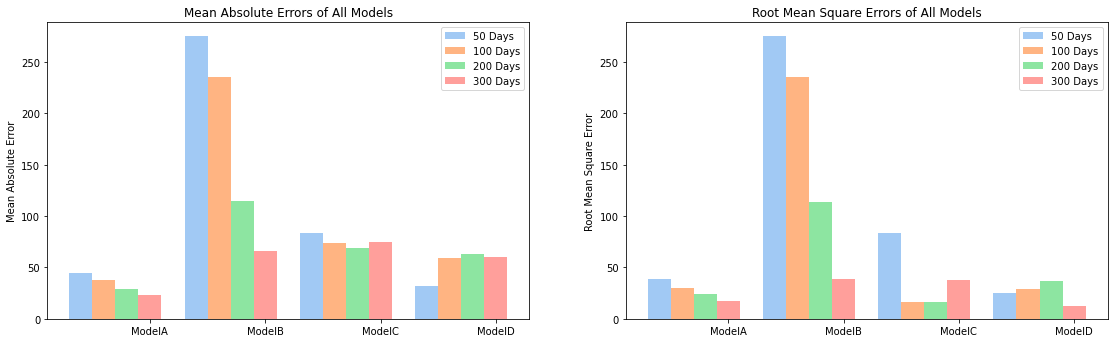

In [66]:
## rmse, mae values for model A 
rmse_A50 = np.sqrt(np.mean(valid_A50['Predictions'] - valid_A50['Close'])**2)
mae_A50 = mean_absolute_error(valid_A50['Close'], valid_A50['Predictions'])
rmse_A100 = np.sqrt(np.mean(valid_A100['Predictions'] - valid_A100['Close'])**2)
mae_A100 = mean_absolute_error(valid_A100['Close'], valid_A100['Predictions'])
rmse_A200 = np.sqrt(np.mean(valid_A200['Predictions'] - valid_A200['Close'])**2)
mae_A200 = mean_absolute_error(valid_A200['Close'], valid_A200['Predictions'])
rmse_A300 = np.sqrt(np.mean(valid_A300['Predictions'] - valid_A300['Close'])**2)
mae_A300 = mean_absolute_error(valid_A300['Close'], valid_A300['Predictions'])

## rmse, mae values for model B
rmse_B50 = np.sqrt(np.mean(valid_B50['Predictions'] - valid_B50['Close'])**2)
mae_B50 = mean_absolute_error(valid_B50['Close'], valid_B50['Predictions'])
rmse_B100 = np.sqrt(np.mean(valid_B100['Predictions'] - valid_B100['Close'])**2)
mae_B100 = mean_absolute_error(valid_B100['Close'], valid_B100['Predictions'])
rmse_B200 = np.sqrt(np.mean(valid_B200['Predictions'] - valid_B200['Close'])**2)
mae_B200 = mean_absolute_error(valid_B200['Close'], valid_B200['Predictions'])
rmse_B300 = np.sqrt(np.mean(valid_B300['Predictions'] - valid_B300['Close'])**2)
mae_B300 = mean_absolute_error(valid_B300['Close'], valid_B300['Predictions'])

## rmse, mae values for model C
rmse_C50 = np.sqrt(np.mean(valid_C50['Predictions'] - valid_C50['Close'])**2)
mae_C50 = mean_absolute_error(valid_C50['Close'], valid_C50['Predictions'])
rmse_C100 = np.sqrt(np.mean(valid_C100['Predictions'] - valid_C100['Close'])**2)
mae_C100 = mean_absolute_error(valid_C100['Close'], valid_C100['Predictions'])
rmse_C200 = np.sqrt(np.mean(valid_C200['Predictions'] - valid_C200['Close'])**2)
mae_C200 = mean_absolute_error(valid_C200['Close'], valid_C200['Predictions'])
rmse_C300 = np.sqrt(np.mean(valid_C300['Predictions'] - valid_C300['Close'])**2)
mae_C300 = mean_absolute_error(valid_C300['Close'], valid_C300['Predictions'])

## rmse, mae values for model D
rmse_D50 = np.sqrt(np.mean(valid_D50['Predictions'] - valid_D50['Close'])**2)
mae_D50 = mean_absolute_error(valid_D50['Close'], valid_D50['Predictions'])
rmse_D100 = np.sqrt(np.mean(valid_D100['Predictions'] - valid_D100['Close'])**2)
mae_D100 = mean_absolute_error(valid_D100['Close'], valid_D100['Predictions'])
rmse_D200 = np.sqrt(np.mean(valid_D200['Predictions'] - valid_D200['Close'])**2)
mae_D200 = mean_absolute_error(valid_D200['Close'], valid_D200['Predictions'])
rmse_D300 = np.sqrt(np.mean(valid_D300['Predictions'] - valid_D300['Close'])**2)
mae_D300 = mean_absolute_error(valid_D300['Close'], valid_D300['Predictions'])

mae_D50_Group = [mae_A50, mae_B50, mae_C50, mae_D50]
mae_D100_Group = [mae_A100, mae_B100, mae_C100, mae_D100]
mae_D200_Group = [mae_A200, mae_B200, mae_C200, mae_D200]
mae_D300_Group = [mae_A300, mae_B300, mae_C300, mae_D300]

rmse_D50_Group = [rmse_A50, rmse_B50, rmse_C50, rmse_D50]
rmse_D100_Group = [rmse_A100, rmse_B100, rmse_C100, rmse_D100]
rmse_D200_Group = [rmse_A200, rmse_B200, rmse_C200, rmse_D200]
rmse_D300_Group = [rmse_A300, rmse_B300, rmse_C300, rmse_D300]

# Plot MAEs
fig2 = plt.figure(figsize=[19,12])
ax5 = fig2.add_subplot(221)
ind = np.arange(len(mae_D50_Group)) 
width = 0.2 
rect50D = ax5.bar(ind - width*3, mae_D50_Group, width,color = c1,
                label='50 Days')
rect100D = ax5.bar(ind - width*2, mae_D100_Group, width,color = c2,
                label='100 Days')
rect200D = ax5.bar(ind - width, mae_D200_Group, width,color = c3,
                label='200 Days')
rect300D = ax5.bar(ind, mae_D300_Group, width,color = c4,
                label='300 Days')
ax5.set_ylabel('Mean Absolute Error')
ax5.set_title('Mean Absolute Errors of All Models')
ax5.set_xticks(ind)
ax5.set_xticklabels(('ModelA', 'ModelB', 'ModelC','ModelD'))
ax5.legend()

# Plot RMSEs
ax6 = fig2.add_subplot(222)
ind = np.arange(len(rmse_D50_Group)) 
width = 0.2 
rmse_rect50D = ax6.bar(ind - width*3, rmse_D50_Group, width,color = c1,
                label='50 Days')
rmse_rect100D = ax6.bar(ind - width*2, rmse_D100_Group, width,color = c2,
                label='100 Days')
rmse_rect200D = ax6.bar(ind - width, rmse_D200_Group, width,color = c3,
                label='200 Days')
rmse_rect300D = ax6.bar(ind, rmse_D300_Group, width,color = c4,
                label='300 Days')
ax6.set_ylabel('Root Mean Square Error')
ax6.set_title('Root Mean Square Errors of All Models')
ax6.set_xticks(ind)
ax6.set_xticklabels(('ModelA', 'ModelB', 'ModelC','ModelD'))
ax6.legend()

## Improvements
According to the previous result, we observed there exists a few problems to tackle with:<br/>
* Why longer period term prediction has better performance than shorter period term prediction in our model? <br/>
* Can we predict multi-attributes instead of close price only? <br/>
* Are we able to incorporate multiple companies' stock data instead of single company?

In [69]:
tsla_1

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
1,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001,-1.092004e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.347500e+07,0.000000,0.000000,1.000000,0.996402,0.000000,0.000000
2,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000,-1.943965e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-5.028050e+07,0.000000,0.000000,0.982883,0.996402,0.000000,0.000000
3,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000,-4.435104e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.511000e+07,0.000000,0.000000,0.982883,1.012399,0.000000,0.000000
4,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001,-3.811283e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.706001e+06,0.000000,0.000000,0.995518,1.012399,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988,3.277361e+09,653.753174,657.048950,648.916992,...,-1.402507,42.599579,-3.295766,3.913639e+09,52.640751,28.872353,12.060252,1.908721,-11.355691,0.146052
1826,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995,3.287270e+09,660.500000,659.796448,651.078979,...,-1.349631,41.506157,0.703537,3.941911e+09,52.730515,25.927839,12.060252,1.910295,-11.331978,0.141186
1827,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971,3.267956e+09,662.496338,660.074524,651.960022,...,-1.300758,35.139870,2.421857,3.915602e+09,49.099762,22.179884,12.060252,1.853258,-12.792139,0.317456
1828,689.549988,671.650024,677.380005,683.799988,23924300.0,683.799988,3.276510e+09,666.104370,661.801392,657.312988,...,-1.223137,41.800255,4.302986,3.939526e+09,51.341499,22.403175,12.060252,1.888696,-13.123097,0.207938


### Checkpoint 1
In the time series problem, we have to predict a value at time T based on the data from T-N where N is the time window. My assumption for the first question is the length of time window is related to the prediction accuracy of different prediction time periods. 

In [75]:
## First, Let's wrap up the neural network. We deicided to stick with the model D since it has the best overall performance.
def LSTM_MODEL_D(df, time_window):
    val = df.values
    ## Split train and test 
    train_len = math.ceil(len(val) * .6)
    train_data = val[:train_len, :]
    train_data = pd.DataFrame(train_data)
    ## Normalization
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    train = scaler.fit_transform(train_data)
    test_data = val[train_len - time_window: , :]
    test = scaler.fit_transform(test_data)
    ## preparing PCA data
    pca_x_train = []
    pca_y_train = []
    for i in range (0, train.shape[0]):
        pca_x_train.append(train[i, 6:])
    for i in range (time_window, train.shape[0]):
        pca_y_train.append(train[i, 3])
    pca_x_train = np.array(pca_x_train)
    pca_y_train = np.array(pca_y_train)
    pca_x_test = []
    pca_y_test = []
    for i in range (0, test.shape[0]):
        pca_x_test.append(test[i, 6:])
    for i in range (time_window, test.shape[0]):
        pca_y_test.append(test[i, 3])
    pca_x_test = np.array(pca_x_test)
    pca_y_test = np.array(pca_y_test)
    ## feature selection
    pca = PCA(n_components=11)
    pca_x_train = pca.fit_transform(pca_x_train)
    pca_x_test = pca.transform(pca_x_test)
    ### concatenate with the basic attributes
    pca_x_train_b = np.concatenate((train[:,0:6], pca_x_train), axis = 1)
    pca_x_test_b = np.concatenate((test[:,0:6], pca_x_test), axis = 1)
    ### convert the dataset back to 3-dimensional for LSTM
    pca_x_train_b2 = []
    pca_x_test_b2 = []
    for i in range (time_window, pca_x_train_b.shape[0]):
        pca_x_train_b2.append(pca_x_train_b[i-time_window:i, :])
    for i in range (time_window, pca_x_test_b.shape[0]):
        pca_x_test_b2.append(pca_x_test_b[i-time_window:i, :])
    pca_x_train_b2 = np.array(pca_x_train_b2)
    pca_x_test_b2 = np.array(pca_x_test_b2)
    ## build model
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(pca_x_train_b2.shape[1], pca_x_train_b2.shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    ## train model 
    model.fit(pca_x_train_b2, pca_y_train, epochs=20, batch_size=32, validation_data=(pca_x_test_b2, pca_y_test), shuffle=False)
    prediction = model.predict(pca_x_test_b2)
    ## convert back the scaler
    trainPredict_dataset_like = np.zeros(shape=(len(prediction), train.shape[1]))
    trainPredict_dataset_like[:,3] = prediction[:,0]
    prediction_values = scaler.inverse_transform(trainPredict_dataset_like)
    predicted_close = prediction_values[:, 3]
        
    return predicted_close

In [76]:
## Set time window as 60, 100, 200 days 
prediction_60 = LSTM_MODEL_D(tsla_1, 60)
prediction_100 = LSTM_MODEL_D(tsla_1, 100)
prediction_200 = LSTM_MODEL_D(tsla_1, 200)

Epoch 1/20
33/33 [==============================] - 8s 82ms/step - loss: 0.3053 - val_loss: 0.2846
Epoch 2/20
33/33 [==============================] - 2s 46ms/step - loss: 0.1574 - val_loss: 0.1795
Epoch 3/20
33/33 [==============================] - 1s 45ms/step - loss: 0.0567 - val_loss: 0.0922
Epoch 4/20
33/33 [==============================] - 1s 44ms/step - loss: 0.0502 - val_loss: 0.1474
Epoch 5/20
33/33 [==============================] - 1s 43ms/step - loss: 0.0441 - val_loss: 0.1286
Epoch 6/20
33/33 [==============================] - 1s 43ms/step - loss: 0.0340 - val_loss: 0.0874
Epoch 7/20
33/33 [==============================] - 1s 43ms/step - loss: 0.0381 - val_loss: 0.1088
Epoch 8/20
33/33 [==============================] - 1s 45ms/step - loss: 0.0353 - val_loss: 0.1387
Epoch 9/20
33/33 [==============================] - 1s 45ms/step - loss: 0.0298 - val_loss: 0.0865
Epoch 10/20
33/33 [==============================] - 1s 45ms/step - loss: 0.0363 - val_loss: 0.0950
Epoch 11/

In [88]:
## get the length of the prediction period
prediction_60.shape

(732,)

In [103]:
## Visual Function 
def visual_diagram(prediction, n):
    train_len = math.ceil(len(val) * .6)
    actual = tsla_2.filter(['Close'])
    valid_2 = data_2[train_len:]
    valid_2['Predictions'] = prediction
    plt.figure(figsize=(16, 8))
    plt.title('Prediction Result of Time Window = %d days, Prediction Period = 732 days' %n)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(valid_2[['Close', 'Predictions']])
    plt.legend(['Val', 'Predictions'], loc='lower right')
    
    return plt

def visual_barchart(prediction, n):
    train_len = math.ceil(len(val) * .6)
    valid_2 = data_2[train_len:]
    actual = valid_2['Close']
    mae = mean_absolute_error(actual, prediction)
    rmse = np.sqrt(np.mean(prediction - actual)**2)
    p1, p2, p3, p4, p5 = sns.color_palette("pastel", 5)
    MAES = [mae]
    RMSES = [rmse]
    plt.figure(figsize=(12, 6))
    ind = np.arange(len(MAES)) 
    width = 0.2
    mae_bar = plt.bar(ind - width*2, MAES, width,color = p1,
                label='Mean Average Value')
    rmse_bar = plt.bar(ind - width, RMSES, width,color = p2,
                label='Root Mean Square Error')
    plt.title('Errot Evaluation of Time Window = %d days, Prediction Period = 732 days' %n)
    plt.xticks(ind)
    plt.legend()

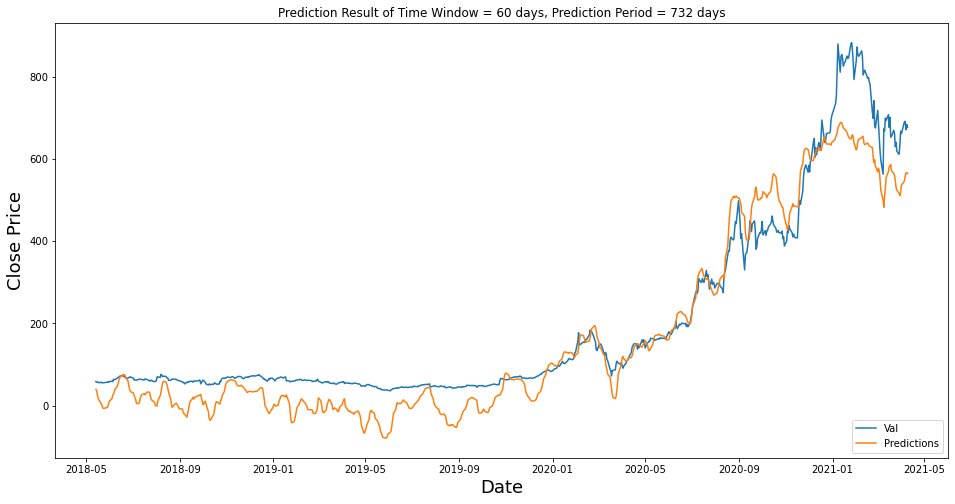

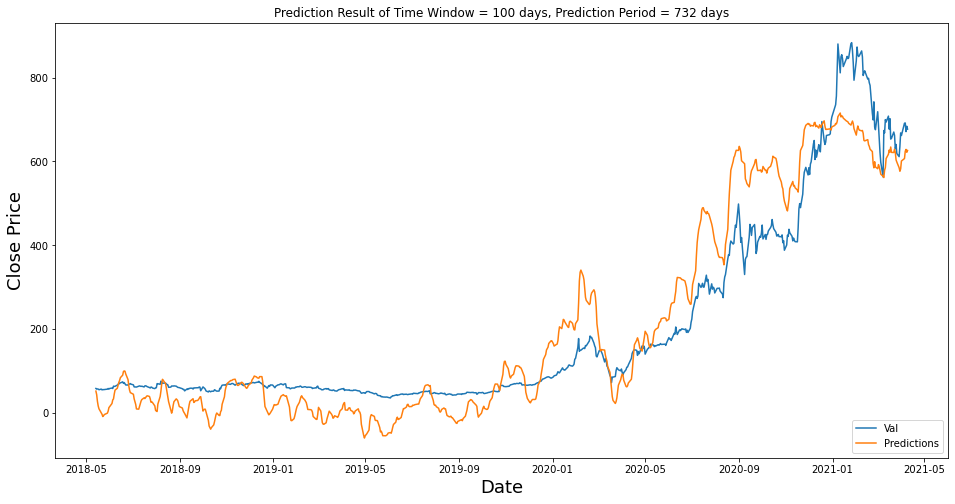

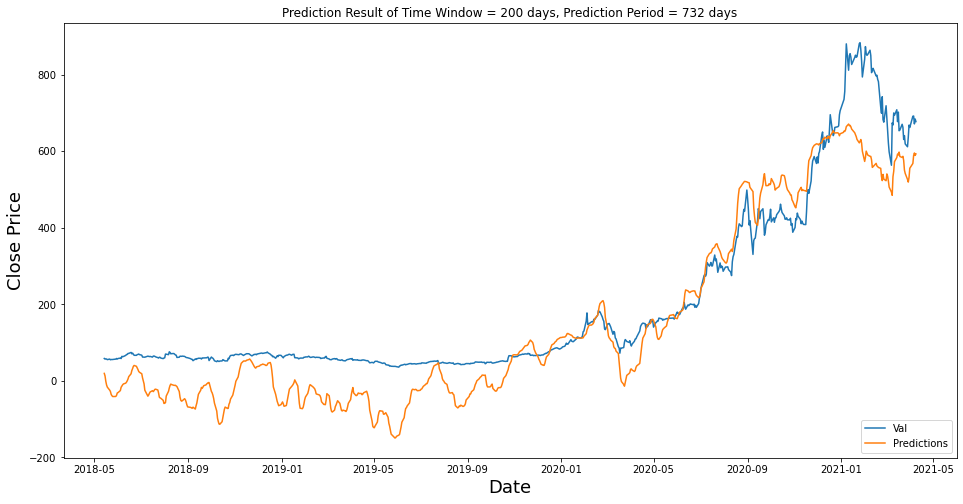

In [104]:
plt_dia_60 = visual_diagram(prediction_60, 60)
plt_dia_60.show()
plt_dia_100 = visual_diagram(prediction_100, 100)
plt_dia_100.show()
plt_dia_200 = visual_diagram(prediction_200, 200)
plt_dia_200.show()

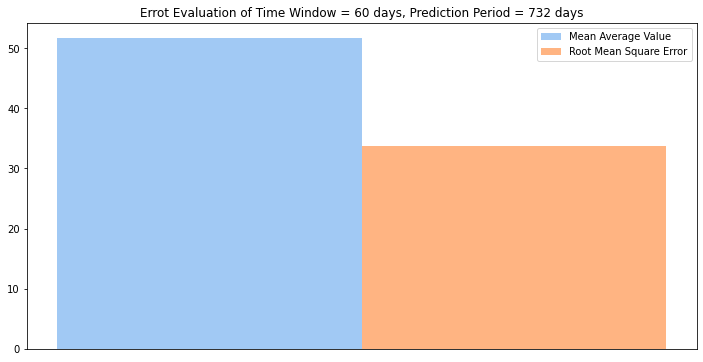

In [106]:
plt_bar_60 = visual_barchart(prediction_60, 60)
plt_bar_60 = visual_barchart(prediction_60, 60)

plt_bar_100 = visual_barchart(prediction_60, 100)
plt_bar_60 = visual_barchart(prediction_60, 60)

## References:
https://www.investopedia.com/ for technical indicators' financial background. <br />
https://github.com/Zicheng-He/PCA-LSTM-in-stock-price-prediction for graphing tools and appraoches.